[Table of Contents](../../index.ipynb)

<font color = 'purple'><h1>FRC Analytics with Python - Session 11</h1> </font>
<font color = 'purple'><h1>11.1 Data Visualization with MatPlotLib</h1> </font>
<font color='purple'>**Last Updated: 27 December 2020**</font> 

## I. Introduction
<font color='#10C2AF'>Data visualization refers to using diagrams that present information via the arrangement of graphic elements. Charts, graphs, plots, tables, and maps are all examples of data visualization. Visualization is an integral part of analytics and data science. It allows easier and more efficient interpretation when data is plentiful. Data visualization is an important skill which is used widely in the professional world. In FRC, we analyze team performance by graphing scouting data which helps us evaluate the strengths and weaknesses of all robots at the competition! </font>

There are many different kinds of data visualizations, both static and interactive. Here are some fun examples on the web:
* [Every Satellite Orbiting Earth](https://qz.com/296941/interactive-graphic-every-active-satellite-orbiting-earth/)
* [Music Timeline](https://thenextweb.com/wp-content/blogs.dir/1/files/2014/01/music_timeline_genres.png)
* [NYC Trees](https://www.cloudred.com/labprojects/nyctrees/#about)
* [Matplotlib Examples](https://matplotlib.org/gallery/index.html#showcase)

There are many packages for creating visualizations in Python. We will start with one of the oldest packages, Matplotlib, which was initially developed in 2002. Matplotlib There are several other popular plotting packages that are built on top of Matplotlib, which means you need to be familiar with Matplotlib to use some of their features. 

We will start with a short introduction to another Python package, Numpy. Numpy provides fast operations on array objects. Many of the examples in the official Matplotlib documentation use Numpy objects. 

## II. Install and Import Matplotlib

### A. Installation
First, install Matplotlib into your conda environment. You only need to do this once. Assuming that your conda environment is called *pyclass*, run these commands in PowerShell or Terminal:
```bash
conda activate pyclass
conda install matplotlib
```

If you are not sure if Matplotlib is installed, you can check with the command `conda list matplotlib`. You shouldn't have to install Numpy because it would have been installed when you installed Pandas.

### B. Importing
The following cell imports the packages required for this session.

In [1]:
# Importing Matplotlib
import matplotlib.pyplot as plt   # line 1
import matplotlib                 # line 2

# Other packages used in this session
import numpy as np
import pandas as pd

# Configure Jupyter to Display Charts
%matplotlib inline

Matplotlib provides a `pyplot` object, which is used continually when creating graphs. To cut down on typing, we import the `plplot` object as `plt` in line 1. We will need to occasionally use Matplotlib features that are not part of the `pyplot` object, which is why we also import `matplotlib` in line 2.

We'll also use the Numpy and Pandas packages in this session. Numpy is a Python package that provides multi-dimensional arrays for fast and sophisticated mathematical calculations

The last line of the preceding code cell contains that statment `%matplotlib inline`. The percentage sign at the beginning of the statement indicates this line is a Jupyter *magic* command, not a Python statement. It configures Jupyter to display Matplotlib charts. [Click here to see more Jupyter *magic* commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html).

## III. Numpy
We'll start our discussion of Numpy (prounounced num-pie, not num-pee) with a short example. First we'll use the [random module](https://docs.python.org/3/library/random.html) from the *Python Standard Library* to create a Python list with 100 randomly generated numbers.

### A. Our First Numpy Array

In [2]:
import random
num_list = [random.uniform(0, 100) for idx in range(10)]
print(num_list)

[94.53728009775362, 86.9779501865228, 31.224018349329373, 63.875365863188335, 3.0450865194455945, 24.915165236998526, 46.8331690077194, 44.35607735403549, 85.05476977943003, 66.5706056761881]


Now we'll use Numpy's `.array()` method to convert the Python list to a Numpy array.

In [3]:
num_array = np.array(num_list)
num_array

array([94.5372801 , 86.97795019, 31.22401835, 63.87536586,  3.04508652,
       24.91516524, 46.83316901, 44.35607735, 85.05476978, 66.57060568])

Individual elements of Numpy arrays can be accessed the same way we access elements of lists.

In [4]:
# Extract every other element, starting with the third and ending
#   with the eighth
num_array[2:8:2]

array([31.22401835,  3.04508652, 46.83316901])

Unlike lists, every element of a Numpy array must be the same data type. Use the dtype attribute to see the data type.

In [5]:
num_array.dtype

dtype('float64')

Also unlike lists, operations on Numpy arrays are element-wise. For example, the following line multiplies every element of the numpy array by ten, creating a new numpy array that is the same length.

In [6]:
10 * num_array

array([945.37280098, 869.77950187, 312.24018349, 638.75365863,
        30.45086519, 249.15165237, 468.33169008, 443.56077354,
       850.54769779, 665.70605676])

### B. Why Numpy?
You may be wondering why we need Numpy arrays when Python lists are so flexible and easy to use. The reason is that the flexibility of Python arrays comes at a cost. Calculations on Python lists are not nearly as fast as calculations on Numpy arrays. Restricting Numpy arrays to contain only a single datatype allows Numpy methods to use fast, low-level machine code to a greater extent than Python lists. The reason that Numpy is automatically installed when you install Pandas is that Pandas `DataFrame` and `Series` objects store data in Numpy arrays.

Keep in mind that Numpy arrays are not better for everything. For example, if you are creating a list with a *for* loop, appending a single elemen to the list at a time, a Python list will work better. Python lists use a data structure called a [dynamic array](https://en.wikipedia.org/wiki/Dynamic_array), which is slower for mathematical calculatins, but much faster for appending items to the end of the list than a Numpy array.

Refer to the [Complete Numpy Manual](https://numpy.org/doc/stable/) or the [Numpy Abosolute Beginners Tutorial](https://numpy.org/doc/stable/user/absolute_beginners.html) to learn more about Numpy.

### C. Common Numpy Functions
Later in this session you will be instructed to read portions of Matplotlib's official documentation. You will come across several common Numpy functions as you read the documentation.

#### 1. `numpy.arange()` and `numpy.linspace()`
The `numpy.arange()` method is similar to Python's built-in `range()` function. The following example creates a numpy array of 16-bit integers. See the [Numpy API documentation](https://numpy.org/doc/stable/reference/generated/numpy.arange.html?highlight=arange#numpy.arange) for details.

In [7]:
# numpy.arange
np.arange(100, 50, -5, np.int16)

array([100,  95,  90,  85,  80,  75,  70,  65,  60,  55], dtype=int16)

Numpy also provides a `.linspace()` function that works similarly to `numpy.arange()`. The first two arguments are the same as `np.arange()`: *start* and *stop*. The third function is the number of values to generate, which will be equally spaced between *start* and *stop*.

In [8]:
# numpy.linspace
np.linspace(5, 10, 17)

array([ 5.    ,  5.3125,  5.625 ,  5.9375,  6.25  ,  6.5625,  6.875 ,
        7.1875,  7.5   ,  7.8125,  8.125 ,  8.4375,  8.75  ,  9.0625,
        9.375 ,  9.6875, 10.    ])

#### 2. Numpy Mathematical functions
Numpy has its own versions of common mathematical functions, which operate element-wise on numpy arrays. Here are a couple examples:

In [9]:
# Calculate cosines of various angles
angles = np.arange(0, 2*np.pi, np.pi/4, np.float32)  # Angles must be in radians
cosines = np.cos(angles)
np.round(cosines, 4)

array([ 1.    ,  0.7071, -0.    , -0.7071, -1.    , -0.7071,  0.    ,
        0.7071], dtype=float32)

In [10]:
# Working with Euler's number
vals = np.arange(0, 3.1, 0.5)
np.exp(vals)

array([ 1.        ,  1.64872127,  2.71828183,  4.48168907,  7.3890561 ,
       12.18249396, 20.08553692])

<font color = 'purple'>
    <h2>IV. Our First Chart</h2>
</font>
We will construct our first Matplotlib chart from California housing data that was gathered during the 1990 census.

### A. The Data
We will load the data into a Pandas dataframe from the *housing.csv* file.

In [11]:
# Loading housing data
house = pd.read_csv("housing.csv")
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Pandas dataframes have a handy `.describe()` method. We'll use it below to see summary statistics for each numeric column. We're not interested in statistics on latitudes and longitudes, so we'll use the `.drop()` method to leave out those columns.

In [12]:
house.drop(columns =['longitude', 'latitude']).describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Do you see how we called a method (`describe()`) on the output from another method (`drop()`)? Linking methods like this occurs frequently when analyzing data -- it's called *method chaining*. Chaining two methods isn't bad, but it can be cumbersome to read and understand longer method chains. It's easier to understand the method chains if every method is written on it's own line. We can put each method on it's own line if we enclose them in parentheses:

In [13]:
(house
  .drop(columns =['longitude', 'latitude'])
  .describe()
  .head(3))

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874


Method chaining in Python can also be accomplished by appending a backslash (`\`) to the end of each line. The backslash tells Python that the statement is continuing on the next line. 

In [14]:
house \
  .drop(columns =['longitude', 'latitude']) \
  .describe() \
  .head(3)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874


One can find examples online of both the backslash and parentheses techniques, but the parenthesis technique is preferred according to the *[Google Python Style Guide](https://google.github.io/styleguide/pyguide.html)*.

Let's check the size of the dataframe.

In [15]:
# Number of dataframe rows
print("Number of rows in dataframe:", house.shape[0])

Number of rows in dataframe: 20640


Twenty-thousand rows is a lot of data to cram into a single chart. We'll use Panda's `.sample()` method to create a smaller dataframe with a random selection of rows.

In [16]:
house_100 = house.sample(100)
print("Number of rows in house_100 dataframe:", house_100.shape[0])

Number of rows in house_100 dataframe: 100


<font color = 'purple'>
    <h3>B. A Simple Chart</h3>
</font>
Our first chart, which will be created in just two lines, is a scatter plot of median home value verses median income for each location in the dataset.

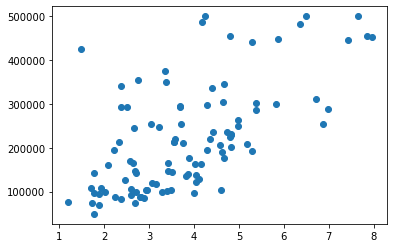

In [17]:
# Create scatter plot
plt.scatter("median_income", "median_house_value", data=house_100)
plt.show()

Here's a description of the statements that created the plot.
* We called the `matplotlib.pyplot.scatter()` method to create the scatter plot. Remember, we imported `matplotlib.pyplot` as `plt`.
* We passed the entire dataframe to the method via the *data* keyword argument.
* The first positional argument tells matplotlib which data to use for the x-coordinate, and the second positional argument specifies what data should be used for the y-coordinate.
* Since we are passing a Pandas dataframe using the `data` argument, we can pass the names of the columns that contain the x and y coordinates as the first two positional arguments.
* The `plt.show()` method tells Matplotlib and Jupyter to display the chart.

It's great that we can create a chart with just a couple lines of code. However our chart is missing a few elements, such as a title and axis labels. These elements are easy to add:

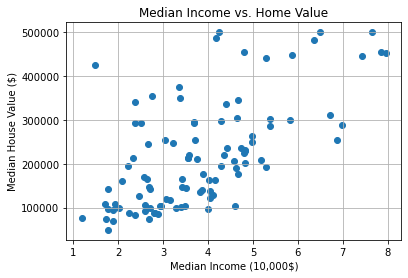

In [18]:
# An enhanced scatter plot
plt.scatter(house_100.median_income, house_100.median_house_value)
plt.xlabel("Median Income (10,000$)")
plt.ylabel("Median House Value ($)")
plt.title("Median Income vs. Home Value")
plt.grid()
plt.show()

The `matplotlib.pyplot` object, which we are referring to as `plt`, was designed to make Matplotlib work similar to Matlab. Matlab is a proprietary programming language and numeric computing software application that is used by many engineers, scientists, and analysts. The `plt` object maintains a current figure, which can include one or more charts. Any method that is run on the `plt`; like `.scatter()`, `title()`, or `show()`; will always be directed to the current figure. Here are descriptions of the `pyplot` methods that we used to generate the preceding plot:
* The `.xlabel()` and `.ylabel()` methods add x and y labels to the plot.
* The `.title()` method adds a title.
* The `.grid()` method adds a grid.

Because `pyplot` methods are always directed towards the current figure, we don't have to specify the chart that we want to modify when we call a `plyplot` method. We can call `plt.figure()` to start a new chart.

You may have noticed that the arguments to the `.scatter()` method have changed. For the sake of demonstration, we used a different technique to pass our data into the `.scatter()` method. We passed individual columns of data as `pandas.Series()` objects to the x and y positional arguments. Matplotlib will accept most common array-like objects, including Python lists, Pandas Series, and Numpy arrays.

### D. First Chart Exercise

##### Ex IV.1
Create a scatter plot of population verses income. Give the plot a title and label both the x and y axes. Does the plot suggest there is a strong relationship between population and income?

In [19]:
# Ex IV.1


## V. PyPlot Tutorial
Now that we've finished our introduction to making charts with Matplotlib, we'll start digging into the official [MatplotLib Pyplot Tutorial](https://matplotlib.org/3.3.3/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py). In this section, you will alternate between reading sections of the tutorial and completing some exercises.

### A. Introduction
Read the first section of the PyPlot Tutorial, [Intro to PyPlot](https://matplotlib.org/3.3.3/tutorials/introductory/pyplot.html#intro-to-pyplot), including the section on *Formatting the Style of Your Plot*.

##### Ex V.1
Use the `range()` function and list comprehensions to create three different lists.
* The first list should contain the integers 1 through 10.
* The second list should contain the squares of the numbers 1 through 10.
* The third list should contain the cubes of the numbers 1 through 10.

Next, convert the lists to Numpy arrays. Finally, plot all three lists on the same plot using the `pyplot.plot()` method. Use the numbers 1 through 10 for the x-coordinates and the three lists that we created as the y coordinates.
* Plot the values from the first list using black squares.
* Plot the squared values in the second list using magenta diamonds.
* Plot the cubed values using red triangles that point to the right. The triangles should be connected by a dotted line.

You will need to refer to the *Format Strings* section of the [API documentation on the pyplot.plot method](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html#) for guidance. The *Format Strings* section is near the bottom of the page.

In [20]:
# Ex V.1


### B. Plotting with Keyword Strings and Categorical Variables
Read the next three sections of the *Pyplot Tutorial*:
* [Plotting with Keyword Strings](https://matplotlib.org/tutorials/introductory/pyplot.html#plotting-with-keyword-strings)
* [Plotting with Categorical Variables](https://matplotlib.org/tutorials/introductory/pyplot.html#plotting-with-categorical-variables)
* [Controlling line Properties](https://matplotlib.org/tutorials/introductory/pyplot.html#controlling-line-properties)

The *Plotting with Keyword Strings* section is a review of material covered earlier in this session.

##### Ex V.2
Read the contents of the *recent-grads.csv* file into a Pandas dataframe. Sort the dataframe by the *Sample_size* column in descending order. Plot a bar chart showing the sample size for the top 10 majors (by sample size).

If you plot a vertical bar chart, then most likely the names of the majors will be plotted over each other below the x axis and they'll be indecipherable. The easiest way to fix this is to plot a horizontal bar chart with the `pyplot.barh()` method. Horizontal bar charts are underrated!

In [21]:
# Ex V.2


### C. Working with Multiple Figures and Axes
Read the next section of the Pyplot tutorial, [Working with Multiple Figures and Axes](https://matplotlib.org/3.3.3/tutorials/introductory/pyplot.html#working-with-multiple-figures-and-axes).

#### Ex V.3
Create a figure with two plots, one above the other, similar to the example in the *Pyplot Tutorial* that you just read. The top plot should plot the value of the sine function (`np.sin`), from 0 to $2\pi$ (i.e., 0 to 360 degrees, but use radians in your code), and the bottom chart should plot the value of the cosine function (`np.cos`) over the same range. Use a black line for the sine plot, and a green line for the cosine plot.
* Use the `np.arange()` method to generate lists of x and y coordinates for both plots


In [22]:
# Ex V.3

### D. Working with Text
Read the next section of the Pyplot tutorial, [Working with Text](https://matplotlib.org/3.3.3/tutorials/introductory/pyplot.html#working-with-text).

#### Ex V.4
Go back and modify the plots you generated for exercise V.3. Add a text label to each plot that states the values at which each function equals zero.

## VI. Matplotlib Usage Guide Tutorial

### A. The Parts of a Figure
Read the first two sections of the [Matplotlib Usage Guide](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py):
* A Simple Example
* Parts of a Figure

This material is mostly conceptual. It will be covered in the quiz.

### B. Object Oriented Interface to MatPlotLib
So far, we've used the `.pyplot` object to creat charts. Matplotlib also provides an object oriented interface that can be used for chart creation. 

Read the third section of the *Matplotlib Usage Guide*, [The Object-Oriented Interface and the Pyplot Interface](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py).

Here is an example of a plot that uses the object oriented interface.

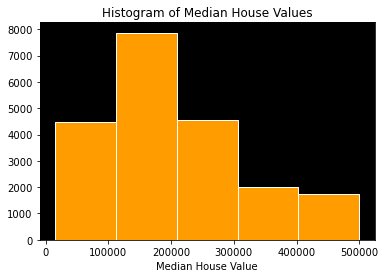

In [23]:
fig, ax = plt.subplots()                         # line 1
ax.hist("median_house_value", bins=5,            # line 2
        color='#ff9d00', edgecolor='w',
        data=house)
ax.set_title("Histogram of Median House Values") # line 3
ax.set_xlabel("Median House Value")              # line 4
ax.set_facecolor('#000000')                      # line 5

1. In line 1, the `pyplot.subplots()` method returns a tuple containing a `Figure` object and an `Axes` object. We use tuple unpacking to assign the objects to two different variables.
2. In line 2 we call a plotting method, `hist()` on the `Axes` object that was returned from the `pyplot.subplots()` method.
3. Lines 3 through 5 modify the appearance of the plot by modifying the `Axes` object.

#### Exercise VI.1
Use object oriented syntax to recreate the scatter plot of income verses house value in section IV.B.

In [24]:
# Exercise VI.1


## VII. Bar Charts
We frequently use bar charts to visualize scouting data. There are several reasons for this:
* We are frequently comparing data from different categories. For example, how many points did various FRC teams score by launching PowerCells into the outer port (*Infinite Recharge*, 2020)? Bar charts are well suited for comparing different categories.
* Bar charts are easier to interpret than pie charts, especially if there are more than two or three categories. Small differences in magnitude are readily apparent.
* By using grouping or stacking, bar charts can show multiple categories of information on the same plot.

### A. A Simple Bar Chart
The *recent_grads.csv* file contains data on college majors from a survey conducted from 2010 to 2012. [The full dataset is available on Kaggle](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-college-majors-dataset). The following code shows the ten majors with the highest number of survey respondents.

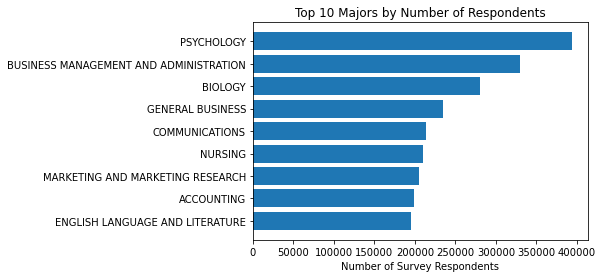

In [25]:
# Majors with most survey respondents
grads = pd.read_csv("recent-grads.csv")
plt.barh("Major", "Total", data=grads.sort_values("Total").tail(10))
plt.title("Top 10 Majors by Number of Respondents")
plt.xlabel("Number of Survey Respondents")
plt.show()

Simple bar charts are not difficult. The most complicated part of the code was the expression to sort the dataframe and extract the final ten rows. It's very common to need more lines of code to prepare data for plotting than are needed to create the plot.

### B. A Grouped Bar Chart
Let's try a more complex example. The following cell generates a grouped horizontal bar chart showing the red and blue alliance scores for playoff matches.

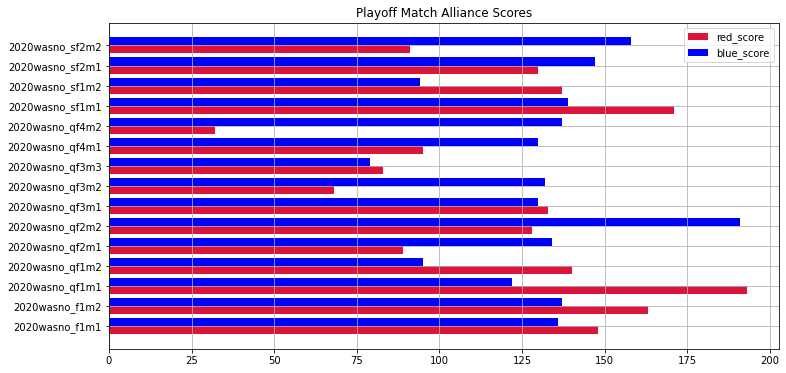

In [26]:
# Load matches dataframe
import pickle
with open("matches.pickle", "rb") as pfile:
    matches = pickle.load(pfile)

# Filter dataframe to only contain playoff matches
playoffs = matches[matches.comp_level!="qm"]

# Create Plot
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

y_pos = np.arange(len(playoffs))  # Calculating the positions of each bar
barheight = 0.4

ax.barh(y=y_pos - barheight/2, width="red_score", data=playoffs,
        color="crimson", height=barheight)
ax.barh(y=y_pos + barheight/2, width="blue_score", data=playoffs,
        color="blue", height=barheight)
ax.set_title("Playoff Match Alliance Scores")
ax.set_yticks(y_pos)
ax.set_yticklabels(playoffs.index.values)
ax.grid()
ax.legend(["red_score", "blue_score"])
plt.show()

The chart is called a *grouped* bar chart because of how the red and blue bars are grouped together for each match. There is a lot going on in this chart:
* We loaded the matches dataframe from a pickle file.
* We created a second dataframe that contained only the playoff matches.
* We used the object oriented syntax to create `Figure` and `Axes` objects.
* We called `Figure.set_size_inches()` to make the plot larger.
* Because we are plotting categorical data, e.g., *finals match 2*, *semi-finals2-match1*, we need to specify the locations on the y axis for each bar. We calculate the positions using the `np.arange()` function and save the positions in the `y_pos` variable.
* Each adjacent position in `y_pos` is one unit apart. Since we want to plot two bars for each position, we set the bar height (actually the width of the bar) to 0.4. There will be two bars, so 80% of the vertical axis will contain a bar.
* We call `Axes.barh()` twice, once to plot the red alliance scores, and once to pass the blue alliance scores. We don't want the red and blue bars to plot on top of each other, so we nudge the blue bars up by half the bar height, and we nudge the red bars down by the same distance. This is done in the `barh()` methods *y* argument.
* We add at title and turn display a grid.
* We also set the positions of the y ticks and tell Matplotlib to use the values form the dataframe's index as the labels for the y tick marks.

## VI. Pandas Plotting Functions
In my opinion, creating grouped bar charts in Matplotlib is more difficult than it should be. Fortunately, Pandas provides a bar chart plotting method that makes creation of grouped bar charts much easier. Here is the same grouped bar chart that is created with the Pandas method.

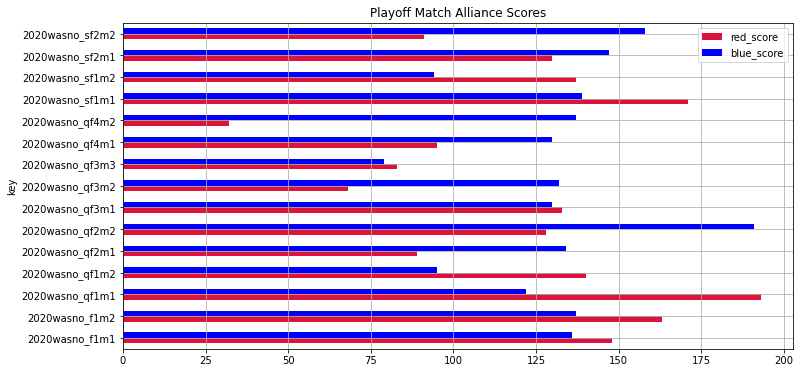

In [27]:
# Grouped bar chart with Pandas Plotting Function
ax = (playoffs[["red_score", "blue_score"]]
      .plot.barh(color=["crimson", "blue"], figsize=(12, 6)))
ax.set_title("Playoff Match Alliance Scores")
ax.grid()
plt.show()

We were able to construct almost exactly the same chart with much less code.
* Pandas displayed multiple columns of data with just a single call to the `.barh()` method.
* By default, Pandas plots the index values on the y axis.
* Pandas automatically grouped the bars such that they don't plot over each other.
* Because the `.barh()` method returns an `Axes` object, we can call Pandas methods to further customize the chart. For example we were able to add a title and a grid.

We can also make a stacked version of the same bar chart by setting the *stacked* argument to True.

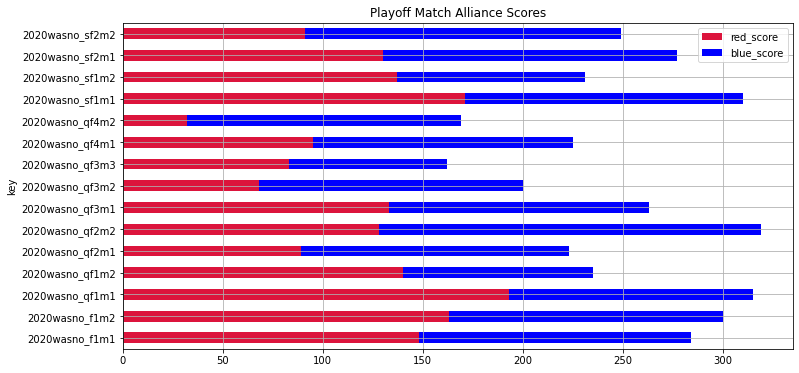

In [28]:
# Stacked bar chart with Pandas Plotting Function
ax = (playoffs[["red_score", "blue_score"]]
      .plot.barh(color=["crimson", "blue"], figsize=(12, 6),
                stacked=True))
ax.set_title("Playoff Match Alliance Scores")
ax.grid()
plt.show()

Pandas provides several functions for plotting data in dataframes, as described in the [visualiazation section of the *Pandas User Guide*](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html). Pandas plotting functions, which use the Matplotlib package, can be more convenient than native Matplotlib functions.

#### Exercise VII.1
Using the `grads` dataframe, create a bar chart showing the ten majors with the lowest unemployment rate. Only include majors with at least 2000 respondents.

In [29]:
# Ex VII.1


## VIII. More Chart Types
Pandas and Matplotlib can construct many different types of charts.

### A. Hexbin Chart
The following example is a hexbin chart of income verses home value, which is similar to the scatter chart we plotted earlier in this session. For the scatter plot, we only plotted 100 randomly selected data points, even though the dataframe has over 20,000 rows. We did this because plotting too many points would result in points being plotted over each other and result in a messy-looking chart. The hexbin chart shows how many data points are within each hexagon, with darker colors indicating more points. With a hexbin chart there is no need to take a randoms sample of the data -- we can see all of it.

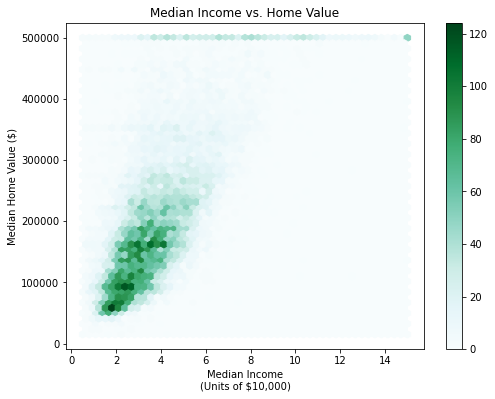

In [30]:
house.plot.hexbin(x="median_income", y="median_house_value",
                       figsize=(8, 6), gridsize=50, sharex=False)
plt.title("Median Income vs. Home Value")
plt.xlabel("Median Income\n(Units of $10,000)")
plt.ylabel("Median Home Value ($)")
plt.show()

### B. Boxplot Charts
Boxplots are an excellent way to show how the range of values of a metric. In the next cell we'll use Pandas's `.boxplot()` method to show how home values vary by proximity to the ocean.

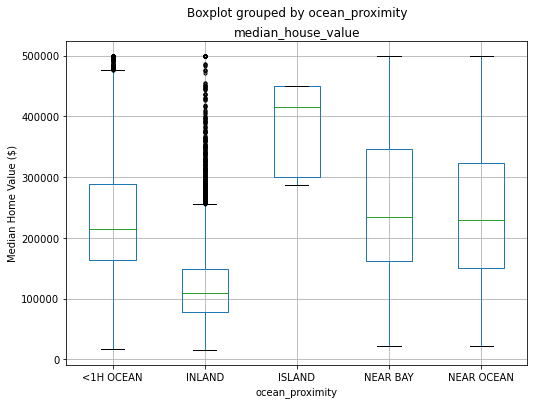

In [31]:
house.boxplot(column="median_house_value", by="ocean_proximity", figsize=(8, 6),
             sym=".")
plt.ylabel("Median Home Value ($)")
plt.show()

* The central line within each box represents the median home value.
* The top and bottom lines in each box represent the third quartile (25% of values are larger than the third quartile) and first quartile (25% of values are smaller than the first quartile).
* The distance between the top and bottom of the box is called the inter-quartile range.
* Values that are greater than 1.5 times the inter-quartile range above the third quartile, or 1.5 times the inter-quartile range below the first quartile, are outliers.
* The vertical lines show the values that are below the first quartile or above the third quartile that are not considered outliers.
* Outliers are individually plotted with small black circles.

#### Exercise VIII.1
Using the `matches` dataframe, Create a histogram of red and blue alliance scores.

In [32]:
# Ex VIII.1


## IX. Layering Charts
Charts can become very informative when we add different layers of data to the same plot. For example, suppose we were interested in the relationship btween median income and home value.

In [33]:
# Get the intercept and slope of the line that best fits the data
intercept, slope = np.polynomial.polynomial.polyfit(
    house.median_income,
    house.median_house_value,
    1)

# Calculate the lines endpoints
incomes = np.array([min(house.median_income), max(house.median_income)])
values = intercept + slope * incomes

The preceding cell calculated the line that best fits all of the data (minizes the square of the errors).

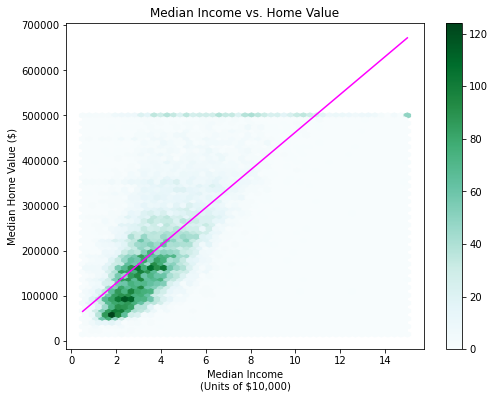

In [34]:
house.plot.hexbin(x="median_income", y="median_house_value",
                       figsize=(8, 6), gridsize=50, sharex=False)
# Add the best fit line
plt.plot(incomes, values, color="magenta")
plt.title("Median Income vs. Home Value")
plt.xlabel("Median Income\n(Units of $10,000)")
plt.ylabel("Median Home Value ($)")
plt.show()

Now we can see both the distribution of the data and the trend line on the same plot. But we are not limited to just two items on the plot, we could add additional lines and points if desired.

#### Exercise IX.1
Add a best fit line to the the scatter-plot version of the income-home-value chart in section IV.B.

In [35]:
# Exercise IX.1


## X. Interactive Charts
All of our charts so far have been static. No manipulation or interaction is possible once the chart is displayed. Using static charts is a good choice when exploring a new dataset because the code for the charts is simpler and less temperamental.

On the other hand, interactive charts can be fun and useful Matplotlib can display interactive charts. This session contains two additional notebooks that provide examples of interactive charts. We're using separate notebooks for for these demonstrations because static and interactive charts do not play well together in the same notebook.
* [11.2: Embedding Interactive Charts in a Notebook](s11.2_interactive_matplotlib_jupyter.ipynb)
* [11.3 Displaying Interactive Charts in Separate Windows](s11.3_interactive_matplotlib_qt.ipynb)

## XI. Other Plotting Packages
There are numerous Python data visualization packages. Here are two that are worth checking out.

### A. Seaborn
[Seaborn](https://seaborn.pydata.org/examples/index.html) is a Python plotting package built on top of Matplotlib. It allows users to create good-looking plots with fewer lines of code. Matplotlib commands are required to customize Seaborn plots.

### B. Bokeh
[Bokeh](https://docs.bokeh.org/en/latest/docs/gallery.html) is a Python plotting package that excels in creating interactive plots. Bokeh does *not* use Matplotlib. The FRC 1318 scouting system uses Bokeh to provide visualizations because of its interactive capabilities.

## XII. Quiz

#### Question #1
Which of the following is a Matplotlib object that represents a single chart, for example, a scatter plot with both an x and y axis?

    A. Figure
    B. Axis
    C. Axes
    D. Tick
    E. Border

In [36]:
#1

#### Question #2
Which of the following is a Matplotlib object that would be used to represent a chart's x or y axis?

    A. Figure
    B. Axis
    C. Axes
    D. Tick
    E. Border

In [37]:
#2


#### Question #3
Which of the following is a Matplotlib object that would be used to represent the entire plot object, which could consist of one or more charts?

    A. Figure
    B. Axis
    C. Axes
    D. Tick
    E. Border

In [38]:
#3


#### Question #4
Section VII included examples of both grouped and stacked bar charts. Which chart to you prefer and why? In what situations is the stacked chart preferred? In what situations is the grouped chart preferred?

In [39]:
#4


#### Question #5
In the box plot in section VIII.B, which group of homes had the highest minimum value? Which group had the smallest inter-quartile range?

In [40]:
#5


#### Question #6
In section IX we saw this line of code:
```python
values = intercept + slope * incomes
```

The variable `values` has type `numpy.ndarray`. Why? What data types are `intercept`, `slope`, and `incomes`?

In [41]:
#6


## XIII. Save Your Work
Once you have completed the exercises, save a copy of the notebook outside of the git repository (outside of the *pyclass_frc* folder). Include your name in the file name. Follow instructions from your instructor to get feedback on your work.

## XIV. Concept and Terminology Review
You should be able to define the following terms or describe the concept.
* Scatter plots
* Bar charts
* Grouped bar charts
* Stacked bar charts
* Histograms
* Box plots
* Hexbin charts
* `numpy.arange()`
* `numpy.linspace()`
* Method chaining
* `matplotlib.pyplot` syntax
* Matplotlib object-oriented syntax
* Matplotlib magic commands (inline, widget, qt5)

[Table of Contents](../../index.ipynb)